In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/felip/Desktop/Proyectos personales/advertising.csv")

In [3]:
data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

In [4]:
#if we want to see haw many columns and files has the dataset
data.shape

(1000, 10)

In [5]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [7]:
for column in data.columns:
    print("{} has the following unique values: {}".format(column,data[column].nunique()))

Daily Time Spent on Site has the following unique values: 900
Age has the following unique values: 43
Area Income has the following unique values: 1000
Daily Internet Usage has the following unique values: 966
Ad Topic Line has the following unique values: 1000
City has the following unique values: 969
Male has the following unique values: 2
Country has the following unique values: 237
Timestamp has the following unique values: 1000
Clicked on Ad has the following unique values: 2


In [8]:
#if you want to make a function that allows you to represent the results in a DataFrame, 
#you cane make something like data
def table_unique_values(data):
    table = pd.DataFrame(data.nunique()).reset_index()
    table.columns = ["Vairable","Unique values"]
    return table

In [9]:
table_unique_values(data)

Vairable  Unique values
0  Daily Time Spent on Site            900
1                       Age             43
2               Area Income           1000
3      Daily Internet Usage            966
4             Ad Topic Line           1000
5                      City            969
6                      Male              2
7                   Country            237
8                 Timestamp           1000
9             Clicked on Ad              2

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

<AxesSubplot:>

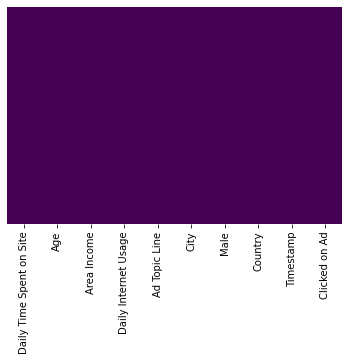

In [10]:
#we want to see the cells which are null
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [11]:
#we observe that de data doesnt have missed values

In [12]:
#if you would like to do a function which shows you the column that doesn have values
#we can define something like that:
def missed_data(data):
    missed_data = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index()
    missed_data.columns = ["Variable", "% of missed values"]
    missed_data["Count of missed values"]=missed_data["% of missed values"]*(len(data)/100)
    return missed_data

In [13]:
missed_data(data)

Variable  % of missed values  Count of missed values
0  Daily Time Spent on Site                 0.0                     0.0
1                       Age                 0.0                     0.0
2               Area Income                 0.0                     0.0
3      Daily Internet Usage                 0.0                     0.0
4             Ad Topic Line                 0.0                     0.0
5                      City                 0.0                     0.0
6                      Male                 0.0                     0.0
7                   Country                 0.0                     0.0
8                 Timestamp                 0.0                     0.0
9             Clicked on Ad                 0.0                     0.0

# Exploratory Data Analysis

In [14]:
#firstly, we describe the data for cuantiative variables
data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

In [15]:
prueba=pd.concat([data["Age"],data["Male"]], axis=1) #axis 1 indicate we are talking about columns

In [16]:
#for the exploratory data visualization, its necesary to distinguish the variables in two sets:
#categorical and not categorical variables:

In [17]:
#would be interesting if we the day and hour where the consumer clicked on the add

In [18]:
data["Timestamp"]=data["Timestamp"].astype(str)

In [19]:
#with the following loops we can extract variable that can interested to us
data["Date"]=[x[0:10] for x in data["Timestamp"]]

In [20]:
data["Hour"]=[x[12:19] for x in data["Timestamp"]]

In [21]:
data["Hora"]=[x[12:13] for x in data["Timestamp"]]

In [22]:
data.iloc[450:500]

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
450                     43.41   28     59144.02                160.73   
451                     55.92   24     33951.63                145.08   
452                     80.67   34     58909.36                239.76   
453                     83.42   25     49850.52                183.42   
454                     82.12   52     28679.93                201.15   
455                     66.17   33     69869.66                238.45   
456                     43.01   35     48347.64                127.37   
457                     80.05   25     45959.86                219.94   
458                     64.88   42     70005.51                129.80   
459                     79.82   26     51512.66                223.28   
460                     48.03   40     25598.75                134.60   
461                     32.99   45     49282.87                177.46   
462                     74.88   27     67240.25                175.17   
463                     36.49   52     42136.33                196.61   
464                     88.04   45     62589.84                191.17   
465                     45.70   33     67384.31                151.12   
466                     82.38   35     25603.93                159.60   
467                     52.68   23     39616.00                149.20   
468                     65.59   47     28265.81                121.81   
469                     65.65   25     63879.72                224.92   
470                     43.84   36     70592.81                167.42   
471                     67.69   37     76408.19                216.57   
472                     78.37   24     55015.08                207.27   
473                     81.46   29     51636.12                231.54   
474                     47.48   31     29359.20                141.34   
475                     75.15   33     71296.67                219.49   
476                     78.76   24     46422.76                219.98   
477                     44.96   50     52802.00                132.71   
478                     39.56   41     59243.46                143.13   
479                     39.76   28     35350.55                196.83   
480                     57.11   22     59677.64                207.17   
481                     83.26   40     70225.60                187.76   
482                     69.42   25     65791.17                213.38   
483                     50.60   30     34191.13                129.88   
484                     46.20   37     51315.38                119.30   
485                     66.88   35     62790.96                119.47   
486                     83.97   40     66291.67                158.42   
487                     76.56   30     68030.18                213.75   
488                     35.49   48     43974.49                159.77   
489                     80.29   31     49457.48                244.87   
490                     50.19   40     33987.27                117.30   
491                     59.12   33     28210.03                124.54   
492                     59.88   30     75535.14                193.63   
493                     59.70   28     49158.50                120.25   
494                     67.80   30     39809.69                117.75   
495                     81.59   35     65826.53                223.16   
496                     81.10   29     61172.07                216.49   
497                     41.70   39     42898.21                126.95   
498                     73.94   27     68333.01                173.49   
499                     58.35   37     70232.95                132.63   

                                         Ad Topic Line                 City  \
450   Customer-focused zero-defect process improvement            Lovemouth   
451                         Focused systemic benchmark          Taylorhaven   
452                  Seamless impactful info

In [23]:
#you can see a tabla that shows the clicks on the ad by Hour. The hour 
data[data["Clicked on Ad"]==1].groupby("Hora").agg(lambda x: x.value_counts()).sort_values(by=["Clicked on Ad"],ascending=False)
#the lambda function allow us to count the Clicks on The ad by hour
#the sort value allows us to organize the data frame in a descending order

Clicked on Ad
Hora               
0                64
3                62
1                59
2                52
7                49
9                47
8                46
4                42
5                40
6                39

In [24]:
#this is other way if you dont want to use value_counts() function
data[data["Clicked on Ad"]==1][["Hora","Clicked on Ad"]].groupby("Hora").agg(lambda x: x.sum())

Clicked on Ad
Hora               
0                64
1                59
2                52
3                62
4                42
5                40
6                39
7                49
8                46
9                47

In [25]:
#if you want to do the previous analysis for any categorical variable
#you, probably, will need a function as follows:
def table_clicks(data,column,variable):
    table = data[data[column]==1][[column,variable]].groupby(variable).agg(lambda x: x.sum()).sort_values(by=[column],ascending=False).reset_index()
    return table

In [26]:
table_clicks(data,"Clicked on Ad","Country")

Country  Clicked on Ad
0          Australia              7
1             Turkey              7
2           Ethiopia              7
3            Liberia              6
4       South Africa              6
..               ...            ...
210       Azerbaijan              1
211  Kyrgyz Republic              1
212           Kuwait              1
213         Kiribati              1
214        Macedonia              1

[215 rows x 2 columns]

# Exploratory visualization analysis

In [27]:
#time series click on Ad
datetimes = pd.to_datetime(data["Date"])

In [28]:
data["Date"]=datetimes

In [29]:
time_series=data[["Date","Clicked on Ad"]]

In [30]:
serie=time_series.set_index("Date")

In [31]:
serie_tiempo=pd.DataFrame(time_series.groupby("Date")["Clicked on Ad"].agg(lambda x: x.sum()))

In [32]:
serie_tiempo

Clicked on Ad
Date                     
2016-01-01              2
2016-01-02              1
2016-01-03              4
2016-01-04              2
2016-01-05              6
...                   ...
2016-07-20              0
2016-07-21              3
2016-07-22              1
2016-07-23              4
2016-07-24              1

[203 rows x 1 columns]

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date'>

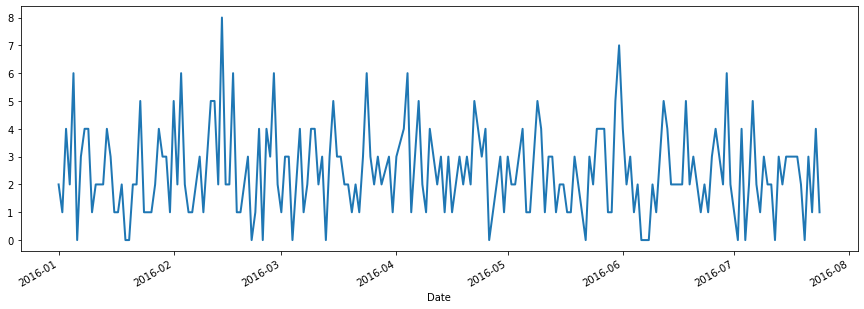

In [34]:
plt.figure(figsize=(15, 5))
serie_tiempo["Clicked on Ad"].plot(linewidth=2)

In [35]:
mes_clicks=serie_tiempo.groupby(pd.Grouper(freq="1w")).agg(lambda x: x.mean())
#A grouper allows the user to specify a gropby instruction for an object
#in this case I do the analysys for weeks

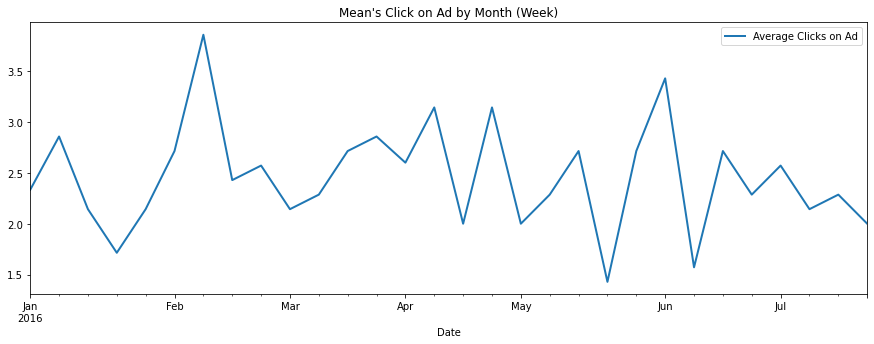

In [36]:
plt.figure(figsize=(15, 5))
plt.title("Mean's Click on Ad by Month (Week)")
mes_clicks["Clicked on Ad"].plot(linewidth=2, label="Average Clicks on Ad")
plt.legend()

<AxesSubplot:xlabel='Date'>

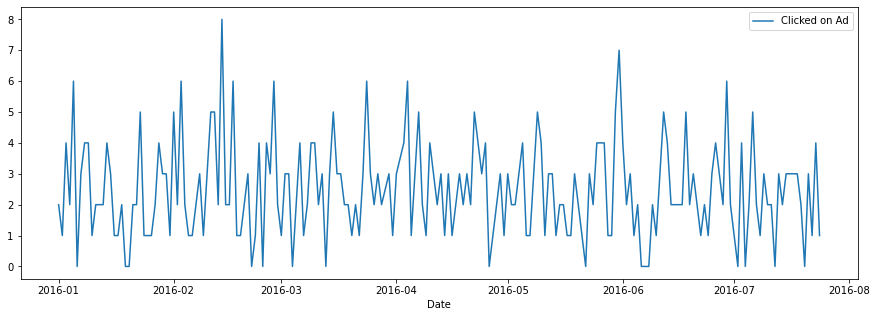

In [37]:
#if you want to do through Seaborn method
plt.figure(figsize=(15, 5))
sns.lineplot(data=serie_tiempo)

In [38]:
data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad       Date  \
0                   Tunisia  2016-03-27 00:53:11              0 2016-03-27   
1                     Nauru  2016-04-04 01:39:02              0 2016-04-04   
2                San Marino  2016-03-13 20:35:42              0 2016-03-13   
3                     Italy  2016-01-10 02:31:19              0 2016-01-10   
4                   Iceland  2016-06-03 03:36:18              0 2016-06-03   
..                      ...                  ...            ...        ...   
995                 Lebanon  2016-02-11 21:49:00              1 2016-02-11   
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1 2016-04-22   
997                Mongolia  2016-02-01 17:24:57              1 2016-02-01   
998               Guatemala  2016-03-24 02:35:54              0 2016-03-24   
999                  Brazil  2016-06-03 21:43:21              1 2016-06-03   

        Hour Hora  
0    0:53:11    0  
1    1:39:02    1  
2    0:35:42    0  
3    2:31:19    2  
4    3:36:18    3  
..       ...  ...  
995  1:49:00    1  
996  2:07:01    2  
997  7:24:57    7  
998  2:35:54    2  
999  1:43:21    1  

[1000 rows x 13 columns]

In [39]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [40]:
import plotly.express as px

In [41]:
fig = px.scatter(data,x="Age",y="Daily Time Spent on Site",color="Clicked on Ad", size="Daily Internet Usage")
fig.show()
#we observe the if you spent much time in the web site, probably, you will not click the Ad
#also if you have an age between 30 and 50 the probability of click on the Ad would be high.

In [42]:
fig = px.scatter(data,x="Daily Internet Usage",y="Area Income",color="Clicked on Ad")
fig.show()
#its curious that, if you daily internet usage is lower than 200, you will click on the Ad
#also, we see a direct relation between Area Income and Daily Internet Usage

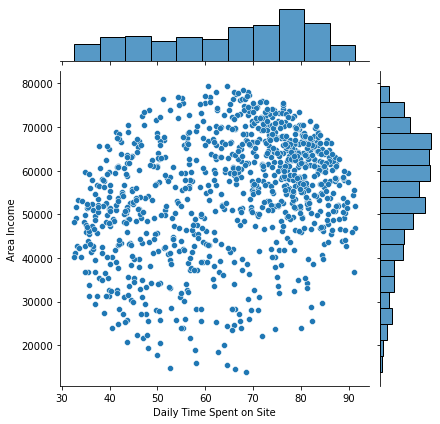

In [80]:
#Create a Joinplot showing area Income versus age
sns.jointplot(x="Daily Time Spent on Site",y="Area Income",data=data)
#we see that its a direct a positive relationship between Area Income and 
#Daily Time Spent on site

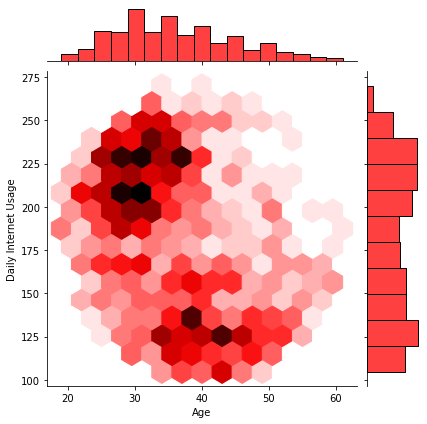

In [91]:
#Create a Joinplot between Daily Internet Usage and age
sns.jointplot(x="Age",y="Daily Internet Usage",data=data,kind="hex",color="red")
#we see that persons who has an age close to 20, has a higher Daily Internet Usage
#than other ages

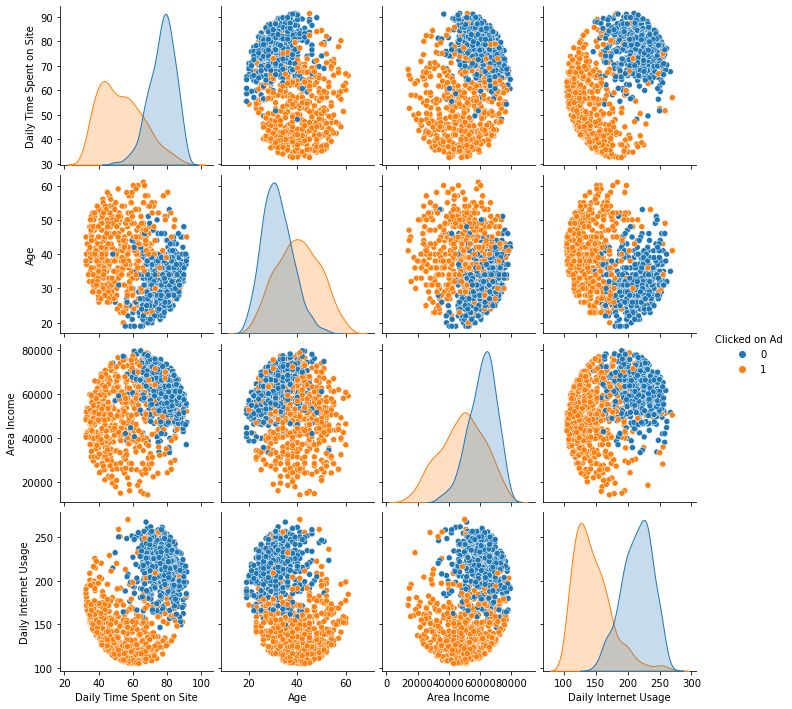

In [93]:
sns.pairplot(data=data.drop("Male",axis=1),hue="Clicked on Ad")
#in the case of Daily Time Spent on Site, we see that people who Clicled on the add, doesn't 
#spent much time in the internet
#in the case of age we see thar persons who hass a less Age, clicked on the add more frequently
#rarely, we observe thar a low income increases the probability the probability to click in the add
#in relation with Daily Internet Usage, all people who has a higher daily internet usage, doesn't
#click on the Add

In [43]:
fig = px.histogram(data,x="Daily Internet Usage",color="Clicked on Ad",marginal="box")
fig.show()
#we can see that the persons who doesn't has a high internet usage,
#click the add more often

In [44]:
#if you want to do an histogram which a histogram for each 
#quantitative variable, you must create a function that shows you the hist.
#if the variable is categorical the function returns you an error
data["Age"].dtypes=="float64"

False

In [45]:
def histograma(data,columna,categorical):
    if data[columna].dtypes=="float64" or data[columna].dtypes=="int64":
        fig = px.histogram(data,x=columna,color=categorical,marginal="box")
        return fig.show()
    else:
        print("The column must be a non categorical variable")

In [46]:
histograma(data,"Area Income","Clicked on Ad")

In [47]:
#let's tru the function with a categorical variable!
histograma(data,"Ad Topic Line","Clicked on Ad")

The column must be a non categorical variable


In [48]:
import matplotlib.pyplot as plt

In [49]:
def pie_chart(data,column):
    labels=data[column].value_counts().index
    sizes=data[column].value_counts().values
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    if data[column].dtypes!="float64" or data[column].dtypes!="int64":
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, labels=labels, colors=colors, autopct='%.2f',shadow=True, startangle=90)
        plt.title(f'% of {column}',color = 'black',fontsize = 8)
        plt.legend()
        plt.show()
    else:
        print("The column must be a categorical variable")

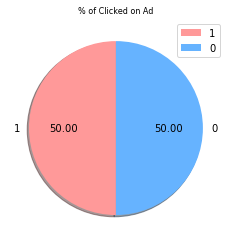

In [50]:
#now, we want to do the analysis for each categorical variable
pie_chart(data,"Clicked on Ad")

# Model prediction

In [51]:
data.head(n=5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad       Date     Hour Hora  
0  2016-03-27 00:53:11              0 2016-03-27  0:53:11    0  
1  2016-04-04 01:39:02              0 2016-04-04  1:39:02    1  
2  2016-03-13 20:35:42              0 2016-03-13  0:35:42    0  
3  2016-01-10 02:31:19              0 2016-01-10  2:31:19    2  
4  2016-06-03 03:36:18              0 2016-06-03  3:36:18    3

In [52]:
data_1=data.copy()
pd.get_dummies(data_1["Ad Topic Line"])

Adaptive 24hour Graphic Interface  Adaptive asynchronous attitude  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
..                                 ...                             ...   
995                                  0                               0   
996                                  0                               0   
997                                  0                               0   
998                                  0                               0   
999                                  0                               0   

     Adaptive context-sensitive application  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
995                                       0   
996                                       0   
997                                       0   
998                                       0   
999                                       0   

     Adaptive contextually-based methodology  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        0   
997                                        0   
998                                        0   
999                                        0   

     Adaptive demand-driven knowledgebase  Adaptive uniform capability  \
0                                       0                            0   
1                                       0                            0   
2                                       0                            0   
3                                       0                            0   
4                                       0                            0   
..                                    ...                          ...   
995                                     0                            0   
996                                     0                            0   
997                                     0                            0   
998                                     0                            0   
999                                     0                            0   

     Advanced 24/7 productivity  Advanced 5thgeneration capability  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   
..                          ...                                ...   
995                           0                                  0   
996                           0                                  0   
997                           0                                  0   
998                           0                                  0   
999                           0                                  0   

     Advanced didactic conglomeration  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0  

In [53]:
data_1

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad       Date  \
0                   Tunisia  2016-03-27 00:53:11              0 2016-03-27   
1                     Nauru  2016-04-04 01:39:02              0 2016-04-04   
2                San Marino  2016-03-13 20:35:42              0 2016-03-13   
3                     Italy  2016-01-10 02:31:19              0 2016-01-10   
4                   Iceland  2016-06-03 03:36:18              0 2016-06-03   
..                      ...                  ...            ...        ...   
995                 Lebanon  2016-02-11 21:49:00              1 2016-02-11   
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1 2016-04-22   
997                Mongolia  2016-02-01 17:24:57              1 2016-02-01   
998               Guatemala  2016-03-24 02:35:54              0 2016-03-24   
999                  Brazil  2016-06-03 21:43:21              1 2016-06-03   

        Hour Hora  
0    0:53:11    0  
1    1:39:02    1  
2    0:35:42    0  
3    2:31:19    2  
4    3:36:18    3  
..       ...  ...  
995  1:49:00    1  
996  2:07:01    2  
997  7:24:57    7  
998  2:35:54    2  
999  1:43:21    1  

[1000 rows x 13 columns]

In [54]:
data_1=data_1.rename(columns={"Ad Topic Line":"Ad_Topic_Line"})

In [55]:
list_categorical=["Ad_Topic_Line","City","Country","Hora"]

In [56]:
ad_topic_line = pd.get_dummies(data_1["Ad_Topic_Line"],drop_first=True)
city = pd.get_dummies(data_1["City"],drop_first=True)
country = pd.get_dummies(data_1["Country"],drop_first=True)
hora = pd.get_dummies(data_1["Hora"],drop_first=True)

In [57]:
hora

1  2  3  4  5  6  7  8  9
0    0  0  0  0  0  0  0  0  0
1    1  0  0  0  0  0  0  0  0
2    0  0  0  0  0  0  0  0  0
3    0  1  0  0  0  0  0  0  0
4    0  0  1  0  0  0  0  0  0
..  .. .. .. .. .. .. .. .. ..
995  1  0  0  0  0  0  0  0  0
996  0  1  0  0  0  0  0  0  0
997  0  0  0  0  0  0  1  0  0
998  0  1  0  0  0  0  0  0  0
999  1  0  0  0  0  0  0  0  0

[1000 rows x 9 columns]

In [58]:
#with this function i concatenate all the data
train = pd.concat([data_1,ad_topic_line,city,country,hora],axis=1)

In [59]:
train

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad_Topic_Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  ... Zimbabwe  \
0                   Tunisia  2016-03-27 00:53:11              0  ...        0   
1                     Nauru  2016-04-04 01:39:02              0  ...        0   
2                San Marino  2016-03-13 20:35:42              0  ...        0   
3                     Italy  2016-01-10 02:31:19              0  ...        0   
4                   Iceland  2016-06-03 03:36:18              0  ...        0   
..                      ...                  ...            ...  ...      ...   
995                 Lebanon  2016-02-11 21:49:00              1  ...        0   
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  ...        0   
997                Mongolia  2016-02-01 17:24:57              1  ...        0   
998               Guatemala  2016-03-24 02:35:54              0  ...        0   
999                  Brazil  2016-06-03 21:43:21              1  ...        0   

     1  2  3  4  5  6  7  8  9  
0    0  0  0  0  0  0  0  0  0  
1    1  0  0  0  0  0  0  0  0  
2    0  0  0  0  0  0  0  0  0  
3    0  1  0  0  0  0  0  0  0  
4    0  0  1  0  0  0  0  0  0  
..  .. .. .. .. .. .. .. .. ..  
995  1  0  0  0  0  0  0  0  0  
996  0  1  0  0  0  0  0  0  0  
997  0  0  0  0  0  0  1  0  0  
998  0  1  0  0  0  0  0  0  0  
999  1  0  0  0  0  0  0  0  0  

[1000 rows x 2225 columns]

In [60]:
#i want to grop all the columns that i converted in dummy variables
train.drop(["Ad_Topic_Line","City","Country","Timestamp","Date","Hour","Hora"],axis=1,inplace=True)

In [61]:
train

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad  Adaptive asynchronous attitude  \
0                0                               0   
1                0                               0   
2                0                               0   
3                0                               0   
4                0                               0   
..             ...                             ...   
995              1                               0   
996              1                               0   
997              1                               0   
998              0                               0   
999              1                               0   

     Adaptive context-sensitive application  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
995                                       0   
996                                       0   
997                                       0   
998                                       0   
999                                       0   

     Adaptive contextually-based methodology  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        0   
997                                        0   
998                                        0   
999                                        0   

     Adaptive demand-driven knowledgebase  ...  Zimbabwe  1  2  3  4  5  6  7  \
0                                       0  ...         0  0  0  0  0  0  0  0   
1                                       0  ...         0  1  0  0  0  0  0  0   
2                                       0  ...         0  0  0  0  0  0  0  0   
3                                       0  ...         0  0  1  0  0  0  0  0   
4                                       0  ...         0  0  0  1  0  0  0  0   
..                                    ...  ...       ... .. .. .. .. .. .. ..   
995                                     0  ...         0  1  0  0  0  0  0  0   
996                                     0  ...         0  0  1  0  0  0  0  0   
997                                     0  ...         0  0  0  0  0  0  0  1   
998                                     0  ...         0  0  1  0  0  0  0  0   
999                                     0  ...         0  1  0  0  0  0  0  0   

     8  9  
0    0  0  
1    0  0  
2    0  0  
3    0  0  
4    0  0  
..  .. ..  
995  0  0  
996  0  0  
997  0  0  
998  0  0  
999  0  0  

[1000 rows x 2218 columns]

In [62]:
#define the depende and indepent variables
X=train.drop("Clicked on Ad",axis=1)
y=train["Clicked on Ad"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#divided the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
#create a instance for the logistic regression model
logmodel = LogisticRegression()

In [67]:
#next step: training the model
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
predictions = logmodel.predict(X_test)

In [69]:
predictions

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       171
           1       0.89      0.88      0.89       159

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

Text(0.5, 15.0, 'Predicted label')

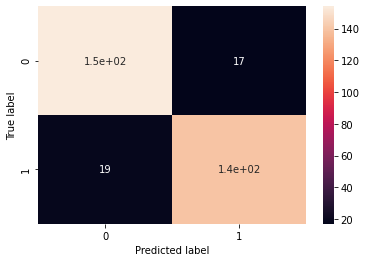

In [74]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [75]:
#the main difference betwwn these two data types - array and list - is the operation
#you can perform of them

In [76]:
data01=data.copy()

In [92]:
data01=data01.rename(columns={"Ad Topic Line":"Ad_Topic_Line"})
list_categorical=["Ad_Topic_Line","City","Country","Hora"]

In [77]:
#¿How to improve the behavior of the algorithm?
#Machine learning algorithms have hyperparameters that allow yo to tailor (adaptar) the behavior of the 
#algotihm to your specific dataset
#Model paramter:
#is a configuration variable that is internal to the model
#and whose value can be estimated from the data
#end up: terminar

In [78]:
#things that you can do for improve the logistic regression:
#1. Standarization of the datasets is a common requirement for a many machine learning estimators
#https://scikit-learn.org/stable/modules/preprocessing.html
#2. Scaling(ajustar)features to lie betwwen a given minimum and maximum value, often between zero 
#and on3.


In [ ]:
#odds: px/1-px, odds are traditionally used instead of probabilities.
#increases in one unit change the odds in B1 or e^b1